In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

## LAX Flight Operations Data Set 

In [2]:
flight_ops_df = pd.read_csv(r'/Users/isaganijulian/Documents/GitHub/LAX_Project/LAX_Flight_Ops.csv')

In [5]:
#Define dictionary
 
column_name_mapping={
    'DataExtractDate' : 'Extract_Date', 
    'ReportPeriod' : 'Report_Period', 
    'FlightType' : 'Flight_Type', 
    'FlightOpsCount' : 'Flight_Ops_Count'
}

# Rename 
flight_ops_df.rename(columns=column_name_mapping, inplace=True)

print(flight_ops_df)

                Extract_Date           Report_Period Flight_Type  \
0     05/10/2021 06:01:09 AM  04/01/2021 12:00:00 AM     Charter   
1     05/27/2021 03:16:34 PM  04/01/2021 12:00:00 AM   Scheduled   
2     05/10/2021 06:01:09 AM  04/01/2021 12:00:00 AM     Charter   
3     05/27/2021 03:16:34 PM  04/01/2021 12:00:00 AM   Scheduled   
4     05/27/2021 03:16:34 PM  04/01/2021 12:00:00 AM   Scheduled   
...                      ...                     ...         ...   
1640  11/14/2023 05:28:19 AM  10/01/2023 12:00:00 AM     Charter   
1641  11/14/2023 05:28:19 AM  10/01/2023 12:00:00 AM     Charter   
1642  11/15/2023 05:28:26 AM  10/01/2023 12:00:00 AM     Charter   
1643  11/18/2023 05:28:20 AM  10/01/2023 12:00:00 AM   Scheduled   
1644  11/18/2023 05:28:20 AM  10/01/2023 12:00:00 AM   Scheduled   

     Arrival_Departure Domestic_International  Flight_Ops_Count  
0            Departure               Domestic                23  
1              Arrival               Domestic      

In [8]:
import pandas as pd 
from datetime import datetime 

# Convert the Extract_Date original format date 
flight_ops_df['Extract_Date'] = pd.to_datetime(flight_ops_df['Extract_Date'], format='%m/%d/%Y %I:%M:%S %p')

# Convert to desired format
flight_ops_df['Extract_Date'] = flight_ops_df['Extract_Date'].dt.strftime('%Y, %B %d, %A %I:%M:%S %p')

# Convert for Report_Period
flight_ops_df['Report_Period'] = pd.to_datetime(flight_ops_df['Report_Period'], format='%m/%d/%Y %I:%M:%S %p')

# Convert to desired format
flight_ops_df['Report_Period'] = flight_ops_df['Report_Period'].dt.strftime('%Y, %B %d, %A %I:%M:%S %p')

In [10]:
# Display basic summary statistics
summary_stats = flight_ops_df.describe()

# Display the number of unique values in each column
unique_counts = flight_ops_df.nunique()

# Display the data types of each column
data_types = flight_ops_df.dtypes

# Display missing values count in each column
missing_values = flight_ops_df.isnull().sum()

# Display summary statistics
print("Summary Statistics:")
print(summary_stats)

# Display unique value counts
print("\nUnique Value Counts:")
print(unique_counts)

# Display data types
print("\nData Types:")
print(data_types)

# Display missing values
print("\nMissing Values:")
print(missing_values)

Summary Statistics:
       Flight_Ops_Count
count       1645.000000
mean        5918.041337
std         7911.833770
min            0.000000
25%           11.000000
50%         2796.000000
75%         9854.000000
max        22989.000000

Unique Value Counts:
Extract_Date              104
Report_Period             214
Flight_Type                 2
Arrival_Departure           2
Domestic_International      2
Flight_Ops_Count          890
dtype: int64

Data Types:
Extract_Date              object
Report_Period             object
Flight_Type               object
Arrival_Departure         object
Domestic_International    object
Flight_Ops_Count           int64
dtype: object

Missing Values:
Extract_Date              0
Report_Period             0
Flight_Type               0
Arrival_Departure         0
Domestic_International    0
Flight_Ops_Count          0
dtype: int64


In [3]:
flight_ops_df=pd.read_csv(r"/Users/isaganijulian/Documents/GitHub/LAX_Analysis/flight_ops/flight_ops_df.csv")

In [5]:
flight_ops_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1645 entries, 0 to 1644
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Extract_Date            1645 non-null   object
 1   Report_Period           1645 non-null   object
 2   Flight_Type             1645 non-null   object
 3   Arrival_Departure       1645 non-null   object
 4   Domestic_International  1645 non-null   object
 5   Flight_Ops_Count        1645 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 77.2+ KB


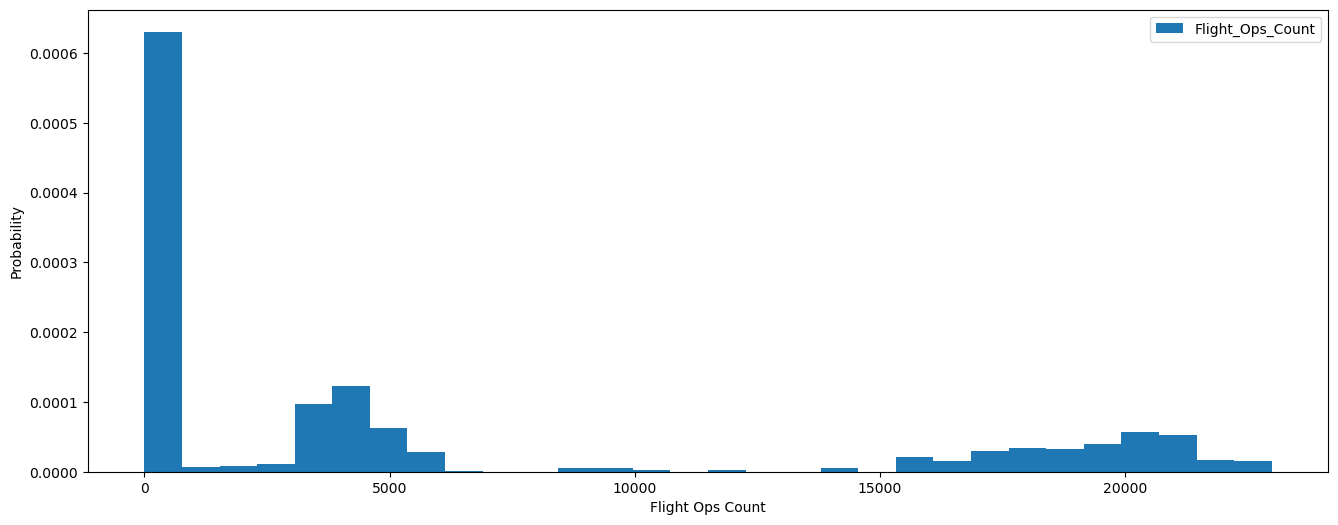

In [6]:
flight_ops_df.plot(kind="hist", y="Flight_Ops_Count", figsize=(16,6), bins=30, density=True)
plt.xlabel("Flight Ops Count")
plt.ylabel("Probability")
plt.show() 

Drop extract date, change Report_Period to datetime, change other columns data type to categories except for the Flight_Ops_Count. 

In [9]:
flight_ops_df=flight_ops_df.drop(["Extract_Date"], axis=1)

In [7]:
flight_ops_df.Report_Period= pd.to_datetime(flight_ops_df.Report_Period)
flight_ops_df["Arrival_Departure"]=flight_ops_df["Arrival_Departure"].astype("category")
flight_ops_df["Domestic_International"]=flight_ops_df["Domestic_International"].astype("category")
flight_ops_df["Flight_Type"]=flight_ops_df["Flight_Type"].astype("category")

/var/folders/cp/wjt9yn4d1mvbjrvvv6c8176w0000gn/T/ipykernel_85027/2679517700.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  flight_ops_df.Report_Period= pd.to_datetime(flight_ops_df.Report_Period)


In [10]:
flight_ops_df.dtypes

Report_Period             datetime64[ns]
Flight_Type                     category
Arrival_Departure               category
Domestic_International          category
Flight_Ops_Count                   int64
dtype: object

In [6]:
data1=flight_ops_df.set_index("Report_Period")

In [7]:
data1.head()

,Flight_Type,Arrival_Departure,Domestic_International,Flight_Ops_Count
Report_Period,,,,
2021-04-01,Charter,Departure,Domestic,23
2021-04-01,Scheduled,Arrival,Domestic,12171
2021-04-01,Charter,Arrival,International,2
2021-04-01,Scheduled,Departure,International,1928
2021-04-01,Scheduled,Departure,Domestic,12179


In [13]:
data1.index = pd.to_datetime(data1.index)

#Exclude categorical columns from resampling 
ressampled_df = data1.select_dtypes(exclude=['category']).resample('A').mean()

ressampled_df

,Flight_Ops_Count
Report_Period,
2006-12-31,6420.922222
2007-12-31,6562.978261
2008-12-31,6085.750000
2009-12-31,5424.702128
2010-12-31,5539.563830
2011-12-31,5766.978947
2012-12-31,5849.914894
2013-12-31,5824.614583
2014-12-31,6282.782609


Text(0.5, 1.0, 'Average FLight Ops Count to Year')

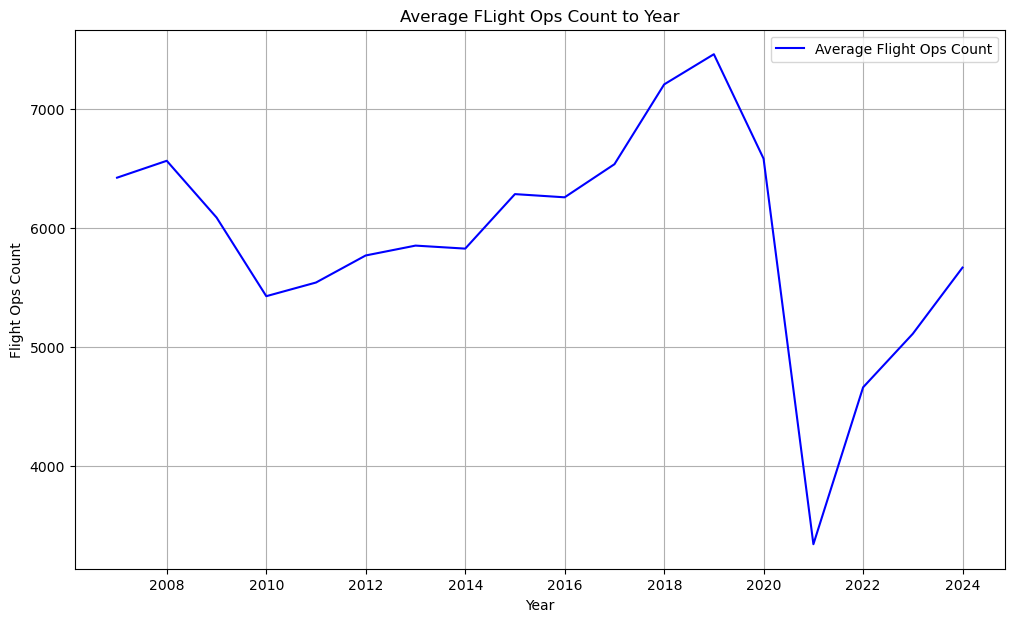

In [15]:
plt.figure(figsize=(12,7))
plt.plot(ressampled_df, color="b",label="Average Flight Ops Count")
plt.grid()
plt.legend()
plt.xlabel("Year")
plt.ylabel("Flight Ops Count")
plt.title("Average FLight Ops Count to Year") 

From the graph you can see a massive drop in the flight ops count starting in 2020, and it slowly starting to pick up in 2021. 

Text(0.5, 1.0, 'Average FLight Ops Count to Month')

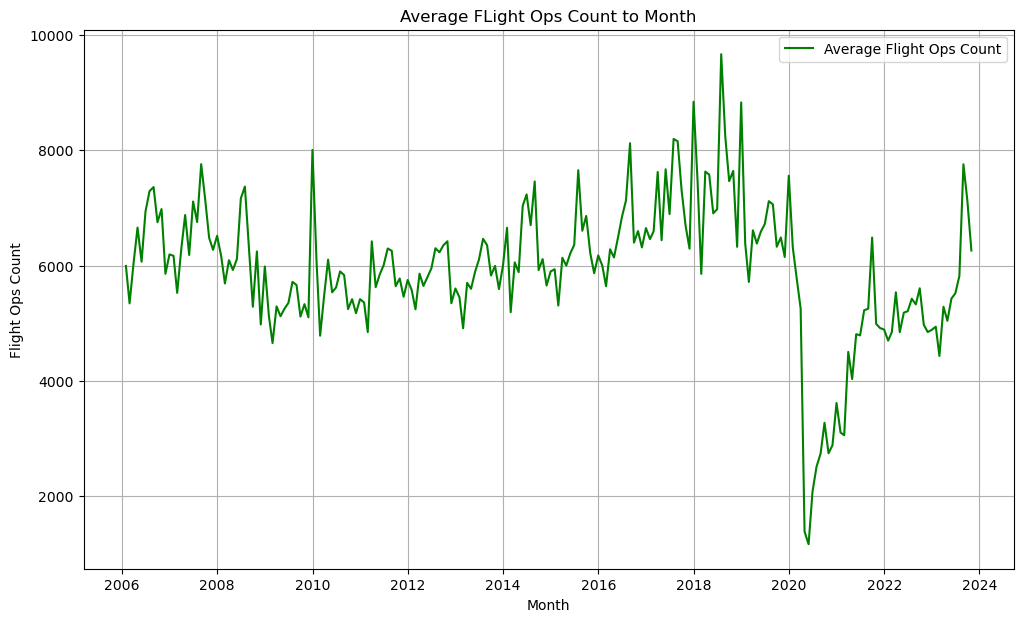

In [16]:
plt.figure(figsize=(12,7))
plt.plot(data1.select_dtypes(exclude=['category']).resample('M').mean(), color="g",label="Average Flight Ops Count")
plt.grid()
plt.legend()
plt.xlabel("Month")
plt.ylabel("Flight Ops Count")
plt.title("Average FLight Ops Count to Month") 

This graph depicts a more accurate depiction for the flight ops count trends based on the months. 

In [17]:
data2=flight_ops_df.set_index(["Report_Period", "Flight_Type","Arrival_Departure", "Domestic_International", "Flight_Ops_Count"])

In [18]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1645 entries, (Timestamp('2021-04-01 00:00:00'), 'Charter', 'Departure', 'Domestic', 23) to (Timestamp('2023-10-01 00:00:00'), 'Scheduled', 'Departure', 'International', 4700)
Empty DataFrame


In [20]:
data2.head(20)

Empty DataFrame
Columns: []
Index: [(2021-04-01 00:00:00, Charter, Departure, Domestic, 23), (2021-04-01 00:00:00, Scheduled, Arrival, Domestic, 12171), (2021-04-01 00:00:00, Charter, Arrival, International, 2), (2021-04-01 00:00:00, Scheduled, Departure, International, 1928), (2021-04-01 00:00:00, Scheduled, Departure, Domestic, 12179), (2021-03-01 00:00:00, Charter, Departure, Domestic, 19), (2021-04-01 00:00:00, Charter, Arrival, Domestic, 17), (2021-03-01 00:00:00, Scheduled, Arrival, Domestic, 11764), (2021-03-01 00:00:00, Scheduled, Arrival, International, 1721), (2021-03-01 00:00:00, Scheduled, Departure, Domestic, 11771), (2021-03-01 00:00:00, Scheduled, Departure, International, 1727), (2021-03-01 00:00:00, Charter, Arrival, Domestic, 18), (2021-04-01 00:00:00, Scheduled, Arrival, International, 1911), (2021-05-01 00:00:00, Scheduled, Arrival, International, 2325), (2021-05-01 00:00:00, Charter, Arrival, International, 2), (2021-05-01 00:00:00, Scheduled, Departure, International, 2369), (2021-05-01 00:00:00, Scheduled, Arrival, Domestic, 14434), (2021-05-01 00:00:00, Charter, Departure, Domestic, 36), (2021-05-01 00:00:00, Scheduled, Departure, Domestic, 14479), (2021-05-01 00:00:00, Charter, Arrival, Domestic, 34)]

In [21]:
flighttype=pd.concat([data1.groupby("Flight_Type")["Flight_Ops_Count"].idxmin(),data1.groupby("Flight_Type")["Flight_Ops_Count"].min(),data1.groupby("Flight_Type")["Flight_Ops_Count"].idxmax(),data1.groupby("Flight_Type")["Flight_Ops_Count"].max()],axis=1)
flighttype.columns.values[0:4]="Minimum Flight Ops Count Date","Minimum Flight Ops Count","Maximum Flight Ops Count Date","Maximum Flight Ops Count"
flighttype

,Minimum Flight Ops Count Date,Minimum Flight Ops Count,Maximum Flight Ops Count Date,Maximum Flight Ops Count
Flight_Type,,,,
Charter,2021-06-01,0,2006-01-01,299
Scheduled,2020-05-01,552,2016-08-01,22989


In [8]:
charter=data1[data1.Flight_Type=="Charter"]
scheduled=data1[data1.Flight_Type=="Scheduled"] 

#Display the fliltered dataframes
print("Charter")
print(charter)

print("Scheduled")
print(scheduled)

Charter
              Flight_Type Arrival_Departure Domestic_International  \
Report_Period                                                        
2021-04-01        Charter         Departure               Domestic   
2021-04-01        Charter           Arrival          International   
2021-03-01        Charter         Departure               Domestic   
2021-04-01        Charter           Arrival               Domestic   
2021-03-01        Charter           Arrival               Domestic   
...                   ...               ...                    ...   
2023-09-01        Charter           Arrival               Domestic   
2023-08-01        Charter         Departure               Domestic   
2023-10-01        Charter         Departure               Domestic   
2023-10-01        Charter           Arrival               Domestic   
2023-10-01        Charter         Departure          International   

               Flight_Ops_Count  
Report_Period                    
2021-04-01   

# Charter Flight Type

In [25]:
charter.describe() 

,Flight_Ops_Count
count,789.000000
mean,17.724968
std,25.026213
min,0.000000
25%,4.000000
50%,10.000000
75%,26.000000
max,299.000000


In [78]:
charter.index = pd.to_datetime(charter.index)

There are 789 charters, the maximum amount of charter flights would be 299, the average charter flights would be 17, while zero charter flights is the minimum. 

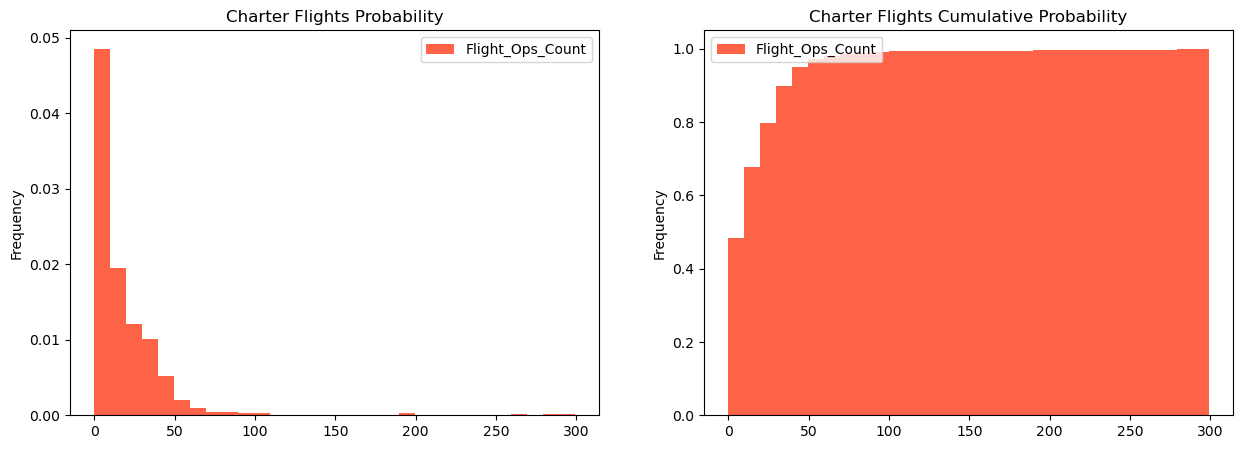

In [26]:
fig, axes=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
charter.plot(kind="hist",bins=30,color="tomato",density=True, ax=axes[0],title="Charter Flights Probability")
charter.plot(kind="hist",bins=30,color="tomato",density=True,ax=axes[1],cumulative=True,title="Charter Flights Cumulative Probability",label="Flight Ops Count")
plt.show()

Charter Flight years to month 

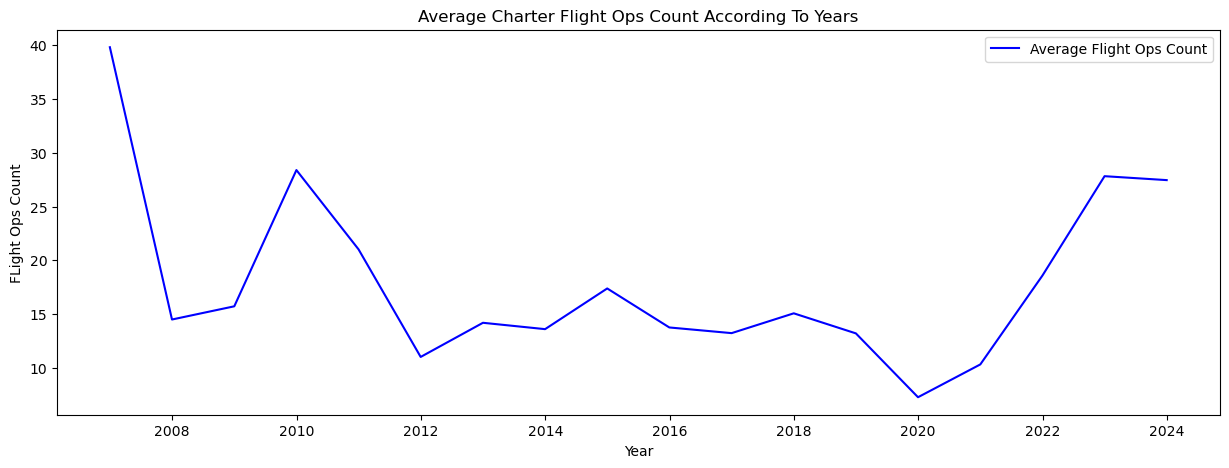

In [27]:
plt.figure(figsize=(15,5))
plt.plot(charter.select_dtypes(exclude=['category']).resample('A').mean(),color="b",label="Average Flight Ops Count")
plt.legend()
plt.xlabel("Year")
plt.ylabel("FLight Ops Count")
plt.title("Average Charter Flight Ops Count According To Years")
plt.show()

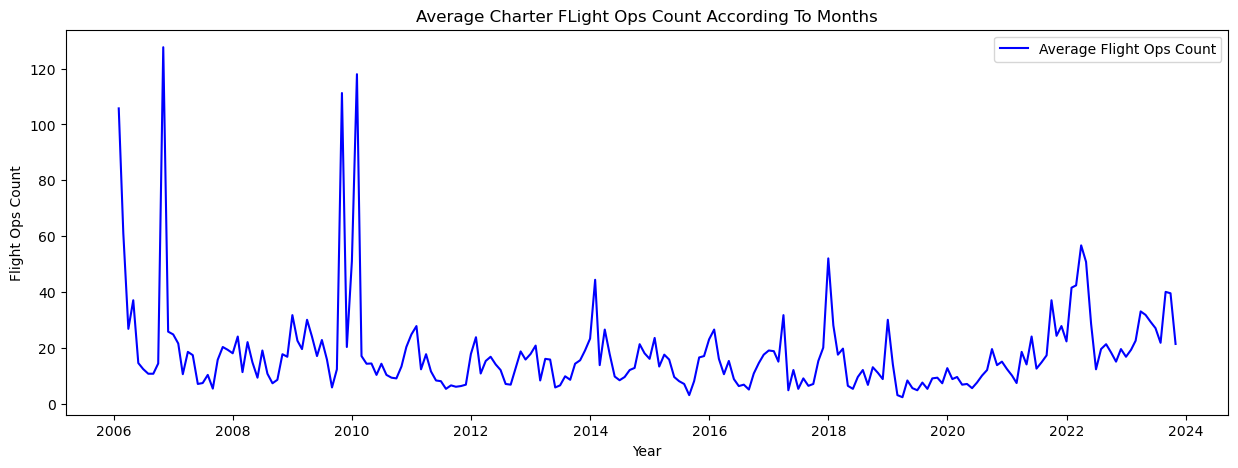

In [28]:
plt.figure(figsize=(15,5))
plt.plot(charter.select_dtypes(exclude=['category']).resample('M').mean(),color="b",label="Average Flight Ops Count")
plt.legend()
plt.xlabel("Year")
plt.ylabel("Flight Ops Count")
plt.title("Average Charter FLight Ops Count According To Months")
plt.show()

Flight Ops Count depicted below accordning to years and months

Compared to the charter flight ops count, the scheduled flights have an increased count. Both flight types experienced a dip in flight opsc ount around the year 2020.

## Arrival and Departure Charter

In [123]:
charter.groupby(["Arrival_Departure"]).describe()

Flight_Ops_Count                                        \
                             count       mean        std  min  25%   50%   
Arrival_Departure                                                          
Arrival                      414.0  17.983092  29.247499  1.0  3.0   9.0   
Departure                    375.0  17.440000  19.360664  0.0  4.0  11.0   

                                
                    75%    max  
Arrival_Departure               
Arrival            24.0  299.0  
Departure          27.0  191.0

There were more flight ops count for  arrival charter flights than departure charter flights. Both arrival and departure chharter flights had an average of 17 flight ops counts. 

In [124]:
arrival = charter[charter['Arrival_Departure'] == 'Arrival'][['Flight_Ops_Count']].copy()
arrival

,Flight_Ops_Count
Report_Period,
2021-04-01,2
2021-04-01,17
2021-03-01,18
2021-05-01,2
2021-05-01,34
...,...
2023-06-01,12
2023-07-01,1
2023-07-01,44


In [125]:
departure = charter[charter['Arrival_Departure'] == 'Departure'][['Flight_Ops_Count']].copy()
departure

,Flight_Ops_Count
Report_Period,
2021-04-01,23
2021-03-01,19
2021-05-01,36
2021-06-01,0
2021-06-01,26
...,...
2023-07-01,1
2023-07-01,41
2023-08-01,42


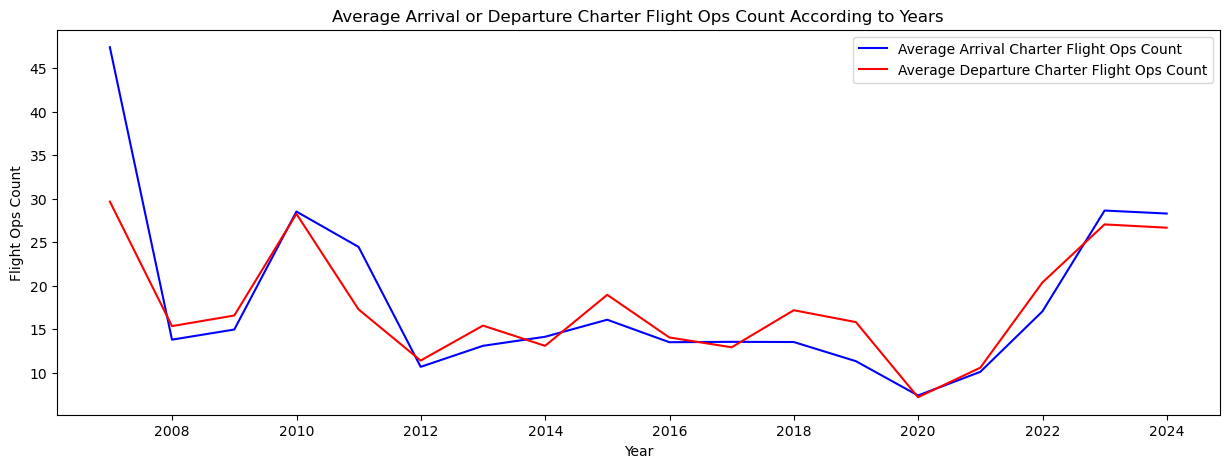

In [130]:
# Plot arrival and departure on the same graph
plt.figure(figsize=(15, 5))

# Plotting arrival
plt.plot(arrival.resample('A').mean(), color="b", label="Average Arrival Charter Flight Ops Count")

# Plotting departure
plt.plot(departure.resample('A').mean(), color="r", label="Average Departure Charter Flight Ops Count")

plt.legend()
plt.xlabel("Year")
plt.ylabel("Flight Ops Count")
plt.title("Average Arrival or Departure Charter Flight Ops Count According to Years")
plt.show()

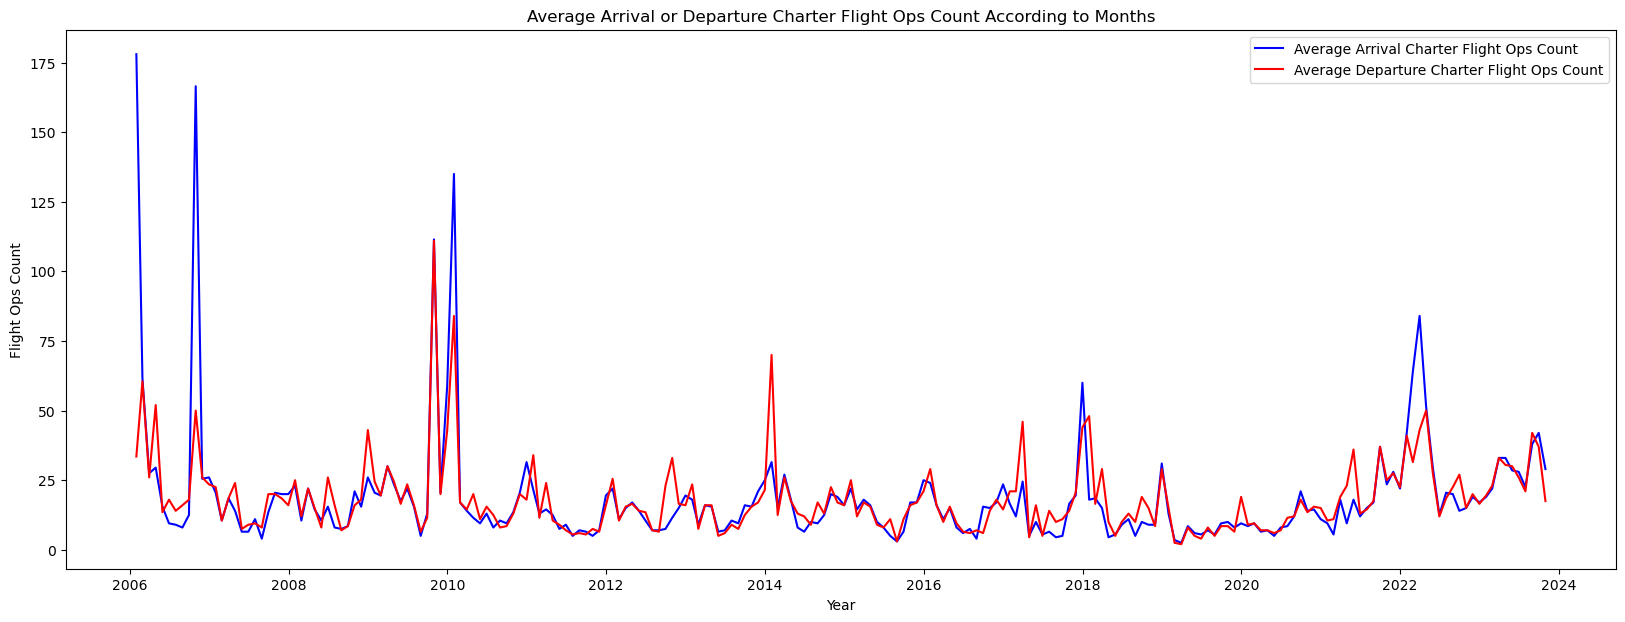

In [129]:
# Plot arrival and departure on the same graph
plt.figure(figsize=(20, 7))

# Plotting arrival
plt.plot(arrival.resample('M').mean(), color="b", label="Average Arrival Charter Flight Ops Count")

# Plotting departure
plt.plot(departure.resample('M').mean(), color="r", label="Average Departure Charter Flight Ops Count")
plt.legend()
plt.xlabel("Year")
plt.ylabel("Flight Ops Count")
plt.title("Average Arrival or Departure Charter Flight Ops Count According to Months")
plt.show()

## International or Domestic Charter

In [37]:
charter.groupby(["Domestic_International"]).describe()

Flight_Ops_Count                                   \
                                  count       mean        std  min   25%   
Domestic_International                                                     
Domestic                          428.0  26.584112  19.713520  2.0  14.0   
International                     361.0   7.221607  26.571406  0.0   2.0   

                                           
                         50%   75%    max  
Domestic_International                     
Domestic                24.0  35.0  269.0  
International            3.0   6.0  299.0

For charter flights, domestic flights have more flight ops counts than international flights. The average count for domestic flights would be 26, while international is 7. 

In [104]:
domestic = charter[charter['Domestic_International'] == 'Domestic'][['Flight_Ops_Count']].copy()
domestic


,Flight_Ops_Count
Report_Period,
2021-04-01,23
2021-03-01,19
2021-04-01,17
2021-03-01,18
2021-05-01,36
...,...
2023-07-01,44
2023-09-01,42
2023-08-01,42


In [105]:
international= charter[charter['Domestic_International'] == 'International'][['Flight_Ops_Count']].copy()
international

,Flight_Ops_Count
Report_Period,
2021-04-01,2
2021-05-01,2
2021-06-01,0
2021-06-01,2
2021-07-01,0
...,...
2023-06-01,10
2023-06-01,12
2023-07-01,1


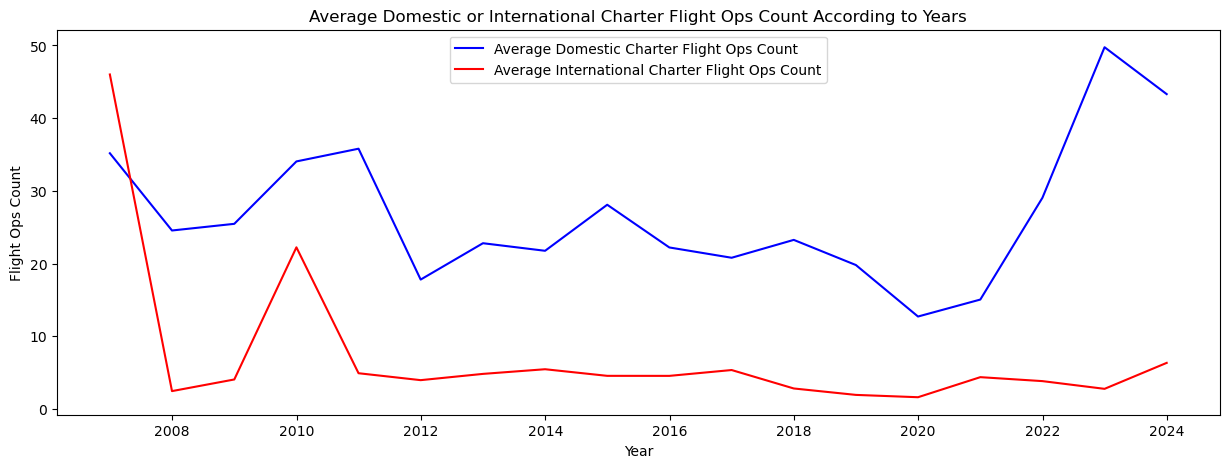

In [128]:

# Plot domestic and international on the same graph
plt.figure(figsize=(15, 5))

# Plotting domestic
plt.plot(domestic.resample('A').mean(), color="b", label="Average Domestic Charter Flight Ops Count")

# Plotting international
plt.plot(international.resample('A').mean(), color="r", label="Average International Charter Flight Ops Count")

plt.legend()
plt.xlabel("Year")
plt.ylabel("Flight Ops Count")
plt.title("Average Domestic or International Charter Flight Ops Count According to Years")
plt.show()

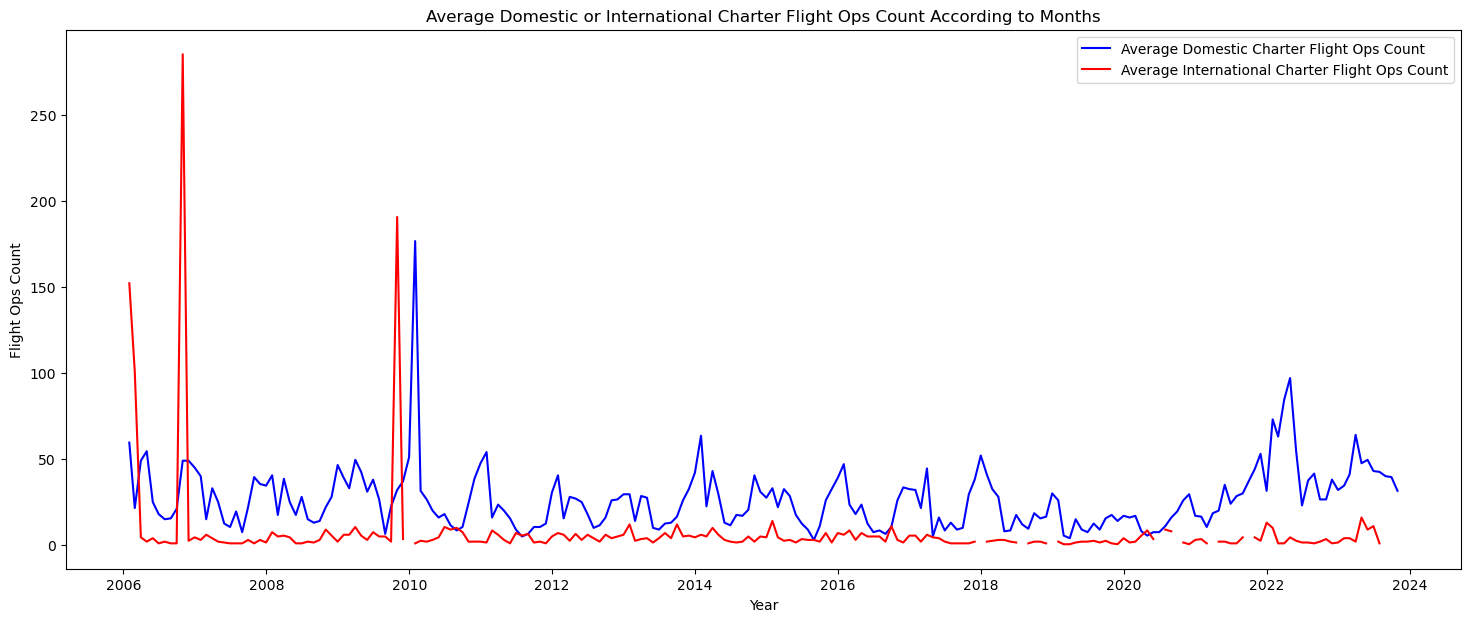

In [121]:
# Plot domestic and international on the same graph
plt.figure(figsize=(18, 7))

# Plotting domestic
plt.plot(domestic.resample('M').mean(), color="b", label="Average Domestic Charter Flight Ops Count")

# Plotting international
plt.plot(international.resample('M').mean(), color="r", label="Average International Charter Flight Ops Count")
plt.legend()
plt.xlabel("Year")
plt.ylabel("Flight Ops Count")
plt.title("Average Domestic or International Charter Flight Ops Count According to Months")
plt.show()

The graph depicts the domestic charter flights having more flight ops counts than the international charter flights. 

# Scheduled Flight Type

In [33]:
scheduled.describe()

,Flight_Ops_Count
count,856.000000
mean,11356.533879
std,7656.594569
min,552.000000
25%,4080.500000
50%,5995.000000
75%,19424.500000
max,22989.000000


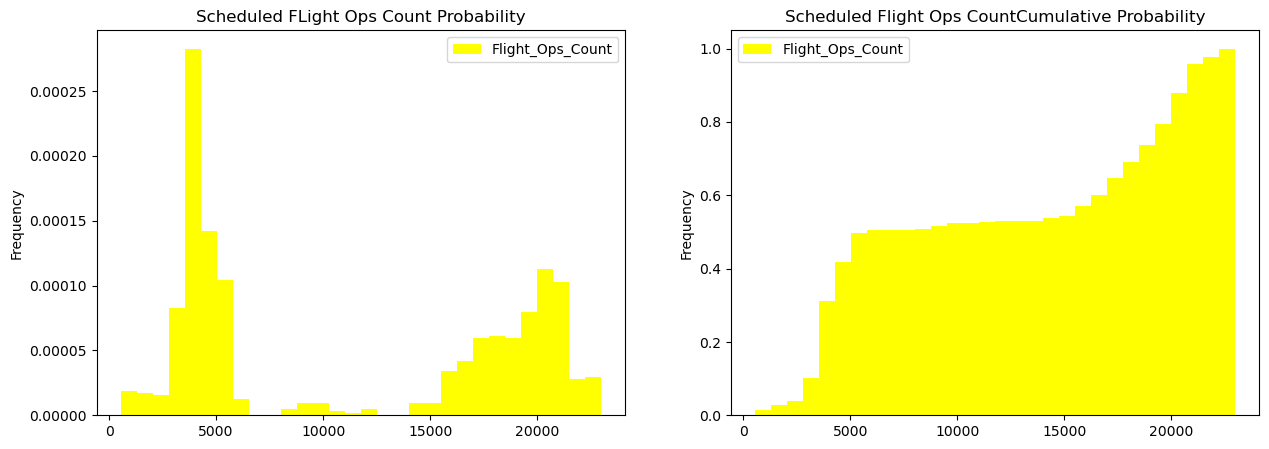

In [34]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
scheduled.plot(kind="hist",bins=30,color="yellow",density=True,ax=axes[0],title="Scheduled FLight Ops Count Probability")
scheduled.plot(kind="hist",bins=30,color="yellow",density=True,ax=axes[1],cumulative=True,title="Scheduled Flight Ops CountCumulative Probability",label="Flight Ops Count")
plt.show()

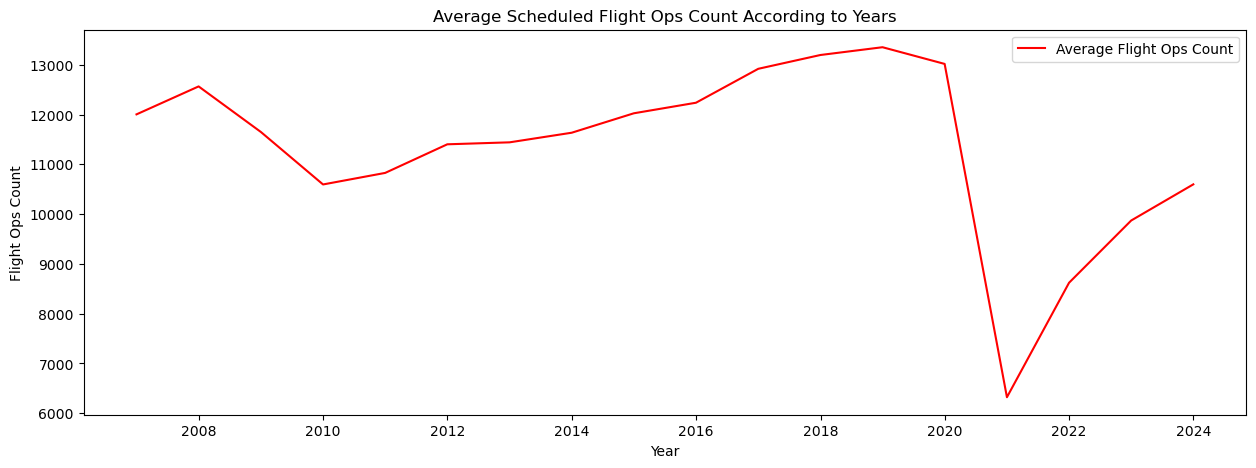

In [35]:
plt.figure(figsize=(15,5))
plt.plot(scheduled.select_dtypes(exclude=['category']).resample('A').mean(),color="r",label="Average Flight Ops Count")
plt.legend()
plt.xlabel("Year")
plt.ylabel("Flight Ops Count")
plt.title("Average Scheduled Flight Ops Count According to Years")
plt.show()

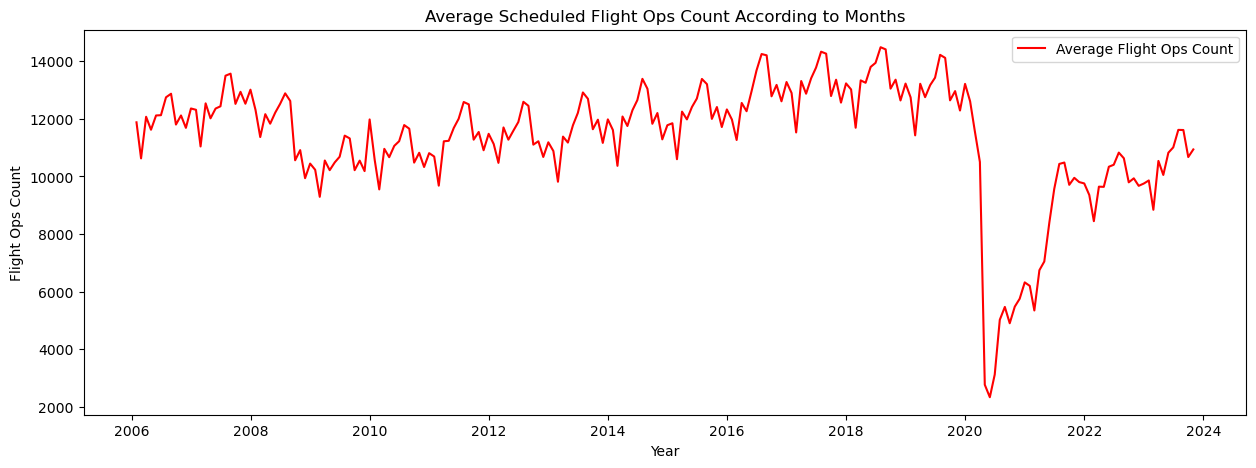

In [36]:
plt.figure(figsize=(15,5))
plt.plot(scheduled.select_dtypes(exclude=['category']).resample('M').mean(),color="r",label="Average Flight Ops Count")
plt.legend()
plt.xlabel("Year")
plt.ylabel("Flight Ops Count")
plt.title("Average Scheduled Flight Ops Count According to Months")
plt.show()

# Arrival or Departure Scheduled

In [9]:
scheduled.groupby(["Arrival_Departure"]).describe()

Flight_Ops_Count                                            \
                             count          mean          std    min     25%   
Arrival_Departure                                                              
Arrival                      428.0  11353.859813  7657.783839  561.0  4076.5   
Departure                    428.0  11359.207944  7664.365893  552.0  4082.5   

                                              
                      50%       75%      max  
Arrival_Departure                             
Arrival            5995.0  19428.75  22983.0  
Departure          5982.5  19423.75  22989.0

There were the same amount of flight ops counts for arrival and departure scheduled type flights. 

In [22]:
arrival_s = scheduled[scheduled['Arrival_Departure'] == 'Arrival'][['Flight_Ops_Count']].copy()
# datetime index
arrival_s.index = pd.to_datetime(arrival_s.index)
arrival_s

,Flight_Ops_Count
Report_Period,
2021-04-01,12171
2021-03-01,11764
2021-03-01,1721
2021-04-01,1911
2021-05-01,2325
...,...
2023-08-01,5131
2023-09-01,16501
2023-09-01,4681


In [23]:
departure_s = scheduled[scheduled['Arrival_Departure'] == 'Departure'][['Flight_Ops_Count']].copy()
# datetime index
departure_s.index = pd.to_datetime(departure_s.index)
departure_s

,Flight_Ops_Count
Report_Period,
2021-04-01,1928
2021-04-01,12179
2021-03-01,11771
2021-03-01,1727
2021-05-01,2369
...,...
2023-07-01,18158
2023-08-01,5246
2023-08-01,18169


Bellow are graphs that depict the arrival or departure scheduled flight ops counts by year and month. 

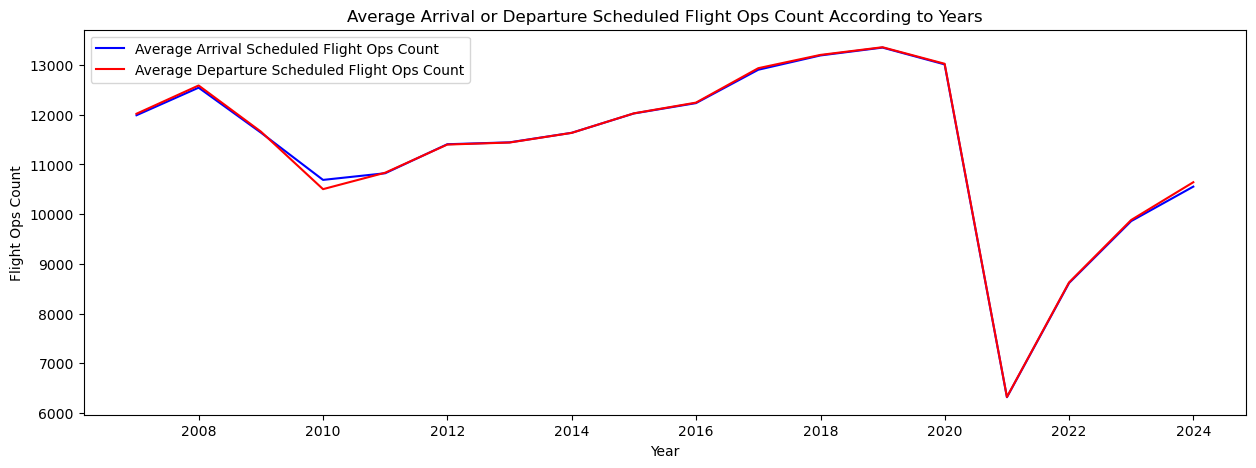

In [19]:
# Plot arrival and departure on the same graph
plt.figure(figsize=(15, 5))

# Plotting arrival
plt.plot(arrival_s.resample('A').mean(), color="b", label="Average Arrival Scheduled Flight Ops Count")

# Plotting departure
plt.plot(departure_s.resample('A').mean(), color="r", label="Average Departure Scheduled Flight Ops Count")

plt.legend()
plt.xlabel("Year")
plt.ylabel("Flight Ops Count")
plt.title("Average Arrival or Departure Scheduled Flight Ops Count According to Years")
plt.show()

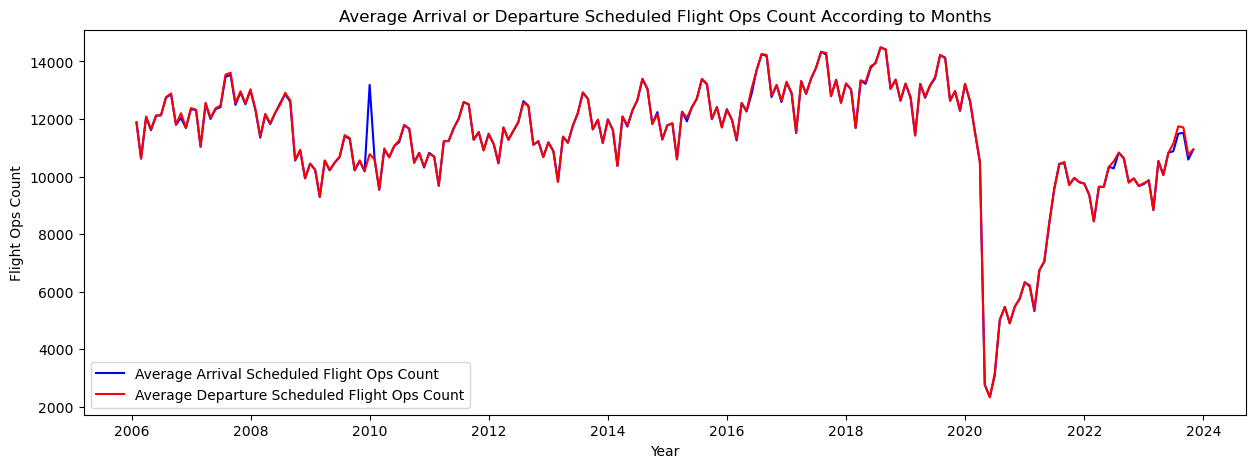

In [20]:
# Plot arrival and departure on the same graph
plt.figure(figsize=(15, 5))

# Plotting arrival
plt.plot(arrival_s.resample('M').mean(), color="b", label="Average Arrival Scheduled Flight Ops Count")

# Plotting departure
plt.plot(departure_s.resample('M').mean(), color="r", label="Average Departure Scheduled Flight Ops Count")

plt.legend()
plt.xlabel("Year")
plt.ylabel("Flight Ops Count")
plt.title("Average Arrival or Departure Scheduled Flight Ops Count According to Months")
plt.show()

# International or Domestic Scheduled 

In [21]:
scheduled.groupby(["Domestic_International"]).describe()

Flight_Ops_Count                                     \
                                  count          mean          std     min   
Domestic_International                                                       
Domestic                          428.0  18632.700935  3195.627616  4106.0   
International                     428.0   4080.366822  1019.287768   552.0   

                                                              
                             25%      50%       75%      max  
Domestic_International                                        
Domestic                17452.50  19425.0  20689.00  22989.0  
International            3665.75   4080.0   4680.25   8760.0

In [25]:
domestic_s = scheduled[scheduled['Domestic_International'] == 'Domestic'][['Flight_Ops_Count']].copy()
# datetime index
domestic_s.index = pd.to_datetime(domestic_s.index)
domestic_s

,Flight_Ops_Count
Report_Period,
2021-04-01,12171
2021-04-01,12179
2021-03-01,11764
2021-03-01,11771
2021-05-01,14434
...,...
2023-08-01,17909
2023-08-01,18169
2023-09-01,16501


In [24]:
international_s = scheduled[scheduled['Domestic_International'] == 'International'][['Flight_Ops_Count']].copy()
# datetime index
international_s.index = pd.to_datetime(international_s.index)
international_s

,Flight_Ops_Count
Report_Period,
2021-04-01,1928
2021-03-01,1721
2021-03-01,1727
2021-04-01,1911
2021-05-01,2325
...,...
2023-08-01,5246
2023-08-01,5131
2023-09-01,4681


Below are the domestic and international scheduled flight ops count by years and months

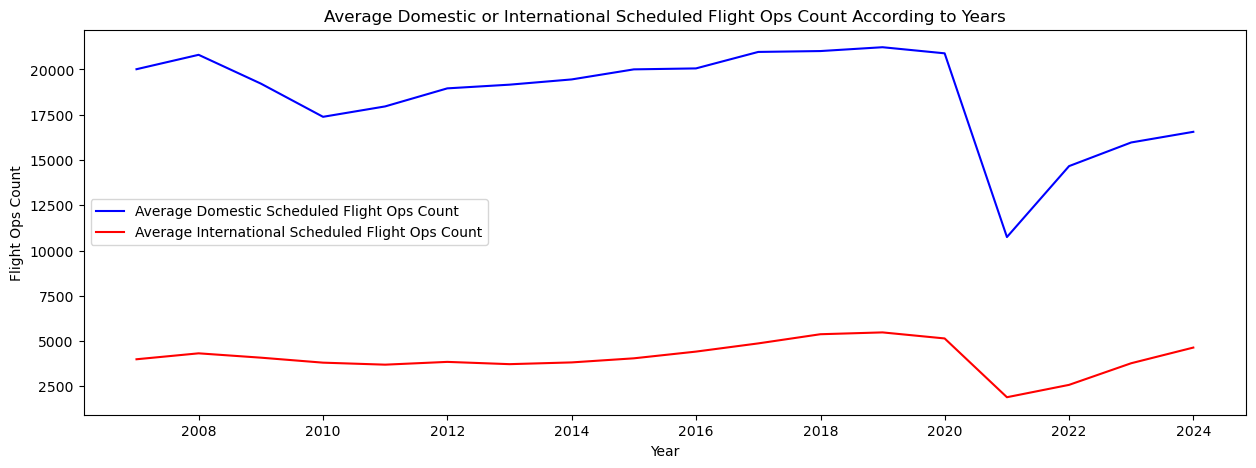

In [27]:
# Plot domestic and international on the same graph
plt.figure(figsize=(15, 5))

# Plotting domestic
plt.plot(domestic_s.resample('A').mean(), color="b", label="Average Domestic Scheduled Flight Ops Count")

# Plotting international 
plt.plot(international_s.resample('A').mean(), color="r", label="Average International Scheduled Flight Ops Count")
plt.legend()
plt.xlabel("Year")
plt.ylabel("Flight Ops Count")
plt.title("Average Domestic or International Scheduled Flight Ops Count According to Years")
plt.show()

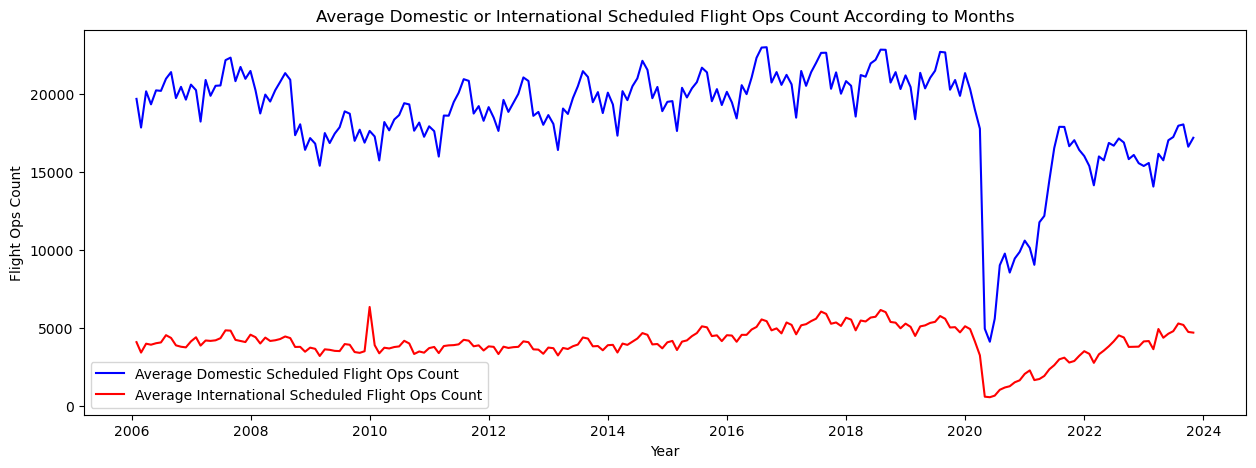

In [28]:
# Plot domestic and international on the same graph
plt.figure(figsize=(15, 5))

# Plotting domestic
plt.plot(domestic_s.resample('M').mean(), color="b", label="Average Domestic Scheduled Flight Ops Count")

# Plotting international 
plt.plot(international_s.resample('M').mean(), color="r", label="Average International Scheduled Flight Ops Count")
plt.legend()
plt.xlabel("Year")
plt.ylabel("Flight Ops Count")
plt.title("Average Domestic or International Scheduled Flight Ops Count According to Months")
plt.show()

In [30]:
flight_ops_df.to_csv('flight_ops_df.csv', index=False)

In [2]:
flight_ops_df=pd.read_csv(r'/Users/isaganijulian/Documents/GitHub/LAX_Analysis/flight_ops/flight_ops_df.csv')

In [3]:
flight_ops_df

,Report_Period,Flight_Type,Arrival_Departure,Domestic_International,Flight_Ops_Count
0,2021-04-01,Charter,Departure,Domestic,23
1,2021-04-01,Scheduled,Arrival,Domestic,12171
2,2021-04-01,Charter,Arrival,International,2
3,2021-04-01,Scheduled,Departure,International,1928
4,2021-04-01,Scheduled,Departure,Domestic,12179
...,...,...,...,...,...
1640,2023-10-01,Charter,Departure,Domestic,34
1641,2023-10-01,Charter,Arrival,Domestic,29
1642,2023-10-01,Charter,Departure,International,1
1643,2023-10-01,Scheduled,Departure,Domestic,17183
